In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv('advertising.csv')

In [24]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [25]:
# Linear Regression

In [26]:
# 1. assumption checking

In [27]:
# 1. Linearity
# 2. no multi-colinearity
# 3. no auto correlation
# 4. no outliers
# 5. no null values

<Axes: >

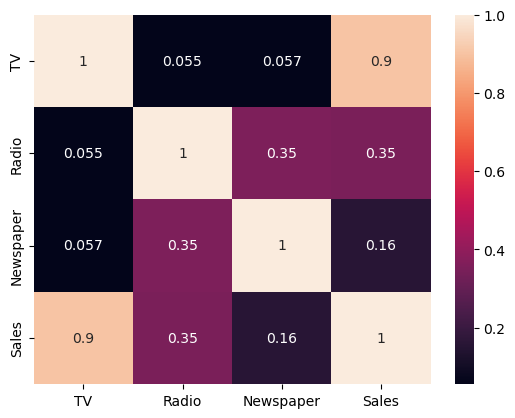

In [34]:
sns.heatmap(data.corr(),annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x14272c6f790>,
 'caps': [<matplotlib.lines.Line2D at 0x14272c75050>,
 'boxes': [<matplotlib.lines.Line2D at 0x14272c6ebd0>],
 'medians': [<matplotlib.lines.Line2D at 0x14272c76650>],
 'fliers': [<matplotlib.lines.Line2D at 0x14272da70d0>],
 'means': []}

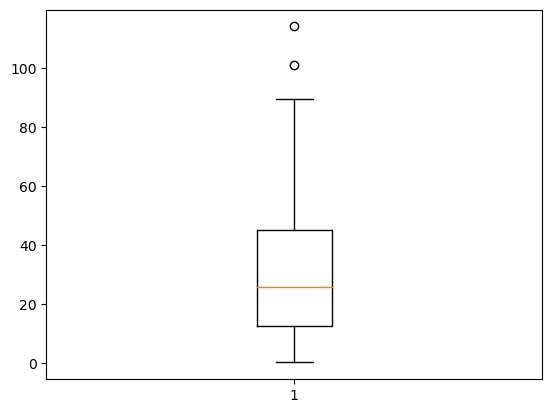

In [41]:
column = data["Newspaper"]
plt.boxplot(column)

In [36]:
data_new = data[column < 90]

In [37]:
data_new

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


{'whiskers': [<matplotlib.lines.Line2D at 0x14272867390>,
 'caps': [<matplotlib.lines.Line2D at 0x14272865250>,
 'boxes': [<matplotlib.lines.Line2D at 0x142728728d0>],
 'medians': [<matplotlib.lines.Line2D at 0x14272c33710>],
 'fliers': [<matplotlib.lines.Line2D at 0x14271b9c390>],
 'means': []}

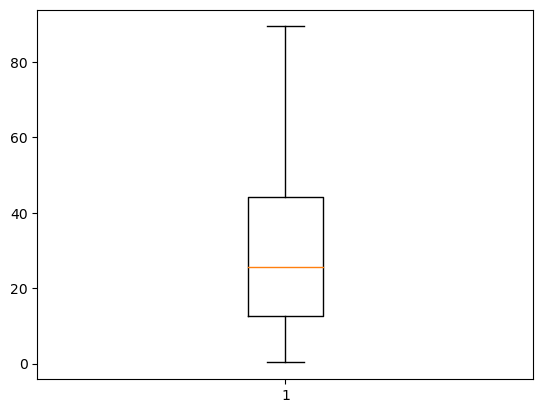

In [38]:
column = data_new["Newspaper"]
plt.boxplot(column)

In [46]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [48]:
# Linear Regression


In [52]:
x = data[['TV','Radio','Newspaper']]
y = data[['Sales']]

In [50]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [53]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [54]:
data.shape

(200, 4)

In [55]:
x.shape

(200, 3)

In [56]:
y.shape

(200, 1)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [58]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)

(160, 1)
(40, 1)


In [63]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train,y_train)

In [64]:
lm.fit(x_train,y_train)

LinearRegression()

In [65]:
# y = b0 + b1x1 + b2x2 + b3x3

In [66]:
print(lm.coef_)

[[0.05325633 0.10451951 0.00331091]]


In [67]:
print(lm.intercept_)

[4.73033301]


<Axes: >

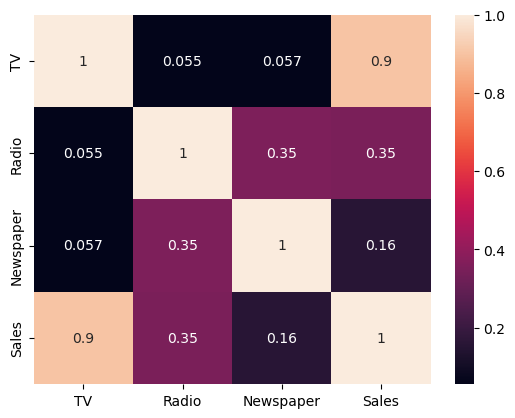

In [68]:
sns.heatmap(data.corr(),annot=True)

In [69]:
x1 =250
x2= 14
x3 = 67

y = 2.85645114 + (0.04713151*x1)+(0.17860138*x2)+(0.00258433*x3)

In [70]:
y

17.31289807

In [71]:
y_pred = lm.predict(x_test)

In [72]:
y_pred

array([[10.29762688],
       [15.20953876],
       [17.3085611 ],
       [21.00020302],
       [12.32109419],
       [21.16456601],
       [10.66036803],
       [16.59419749],
       [ 9.79528406],
       [24.72640978],
       [ 7.85943889],
       [20.29734691],
       [17.98424055],
       [ 8.16649517],
       [22.52486449],
       [12.21355355],
       [16.90505467],
       [24.04038447],
       [16.96224693],
       [15.70501611],
       [15.54364714],
       [18.015227  ],
       [ 8.66649637],
       [ 5.55455793],
       [ 9.03195067],
       [10.55298542],
       [18.08138756],
       [21.65094152],
       [12.34113483],
       [20.95476778],
       [14.1735413 ],
       [21.01855692],
       [ 8.02756986],
       [17.0219644 ],
       [ 5.4111393 ],
       [15.71288884],
       [ 6.17998249],
       [10.7410116 ],
       [10.94714026],
       [ 9.93256456]])

In [73]:
new_df=pd.DataFrame()
new_df = x_test
new_df['actual sales']= y_test
new_df['predicted sales']= y_pred
new_df

,TV,Radio,Newspaper,actual sales,predicted sales
29,70.6,16.0,40.8,10.5,10.297627
120,141.3,26.8,46.2,15.5,15.209539
163,163.5,36.8,7.4,18.0,17.308561
169,284.3,10.6,6.4,20.0,21.000203
73,129.4,5.7,31.3,11.0,12.321094
0,230.1,37.8,69.2,22.1,21.164566
46,89.7,9.9,35.7,10.6,10.660368
103,187.9,17.2,17.9,19.7,16.594197
138,43.0,25.9,20.5,9.6,9.795284
175,276.9,48.9,41.8,27.0,24.726410


In [74]:
lm.score(x_train,y_train)*100

88.88852702170907

In [75]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-squared: 0.9393628644683696
RMSE: 1.47197241890889


In [76]:
import joblib

In [77]:
joblib.dump(lm,"model.pkl")

['model.pkl']